In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
from matplotlib import pyplot as plt
import tikzplotlib
import sys
import json

In [226]:
final_log = {}
for method in os.listdir("./hz-bc-tyc_1"):
    final_log[method] = pickle.load(open('./hz-bc-tyc_1/%s/log.pkl' % method, 'rb'))[-1]

In [57]:
metrics = ['avg_speed', 'travel_time', 'waiting_time', 'fuel_consumption', 'CO_emission', 'CO2_emission']

In [58]:
def change_name_method(method):
    if method == 'MaxPressure':
        return 'MP'
    if method == 'IntelliLight':
        return 'IntelliL'
    if method == 'FixedTime':
        return 'FT'
    return method

In [254]:
data = pd.DataFrame(columns=['method'] + metrics)
for k, v in final_log.items():
    veh_logs = v['veh_logs']
    for log in veh_logs:        
        row = {
            'method': change_name_method(k),
            'avg_speed': log['avg_speed'],
            'travel_time': log['travel_time'],
            'waiting_time': log['waiting_time'],
            'fuel_consumption': log['fuel_consumption'],
            'CO_emission': log['CO_emission'] / 1000000,
            'CO2_emission': log['CO2_emission'] / 1000000
        }
        data = data.append(row, ignore_index=True)

KeyboardInterrupt: 

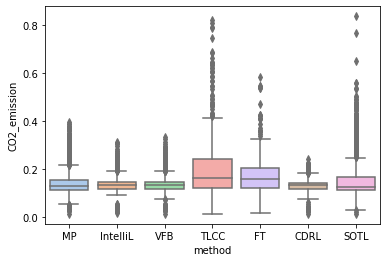

In [102]:
sns.boxplot(x="method", y='CO2_emission', data=data, palette="pastel")
tikzplotlib.save("test1.tex")

In [237]:
data[data.method == 'FT']['CO2_emission'].sum()

309.99121895229405

In [236]:
len(data)/7

1847.0

In [238]:
data[data.method == 'CDRL']['CO2_emission'].sum()

246.49818892639908

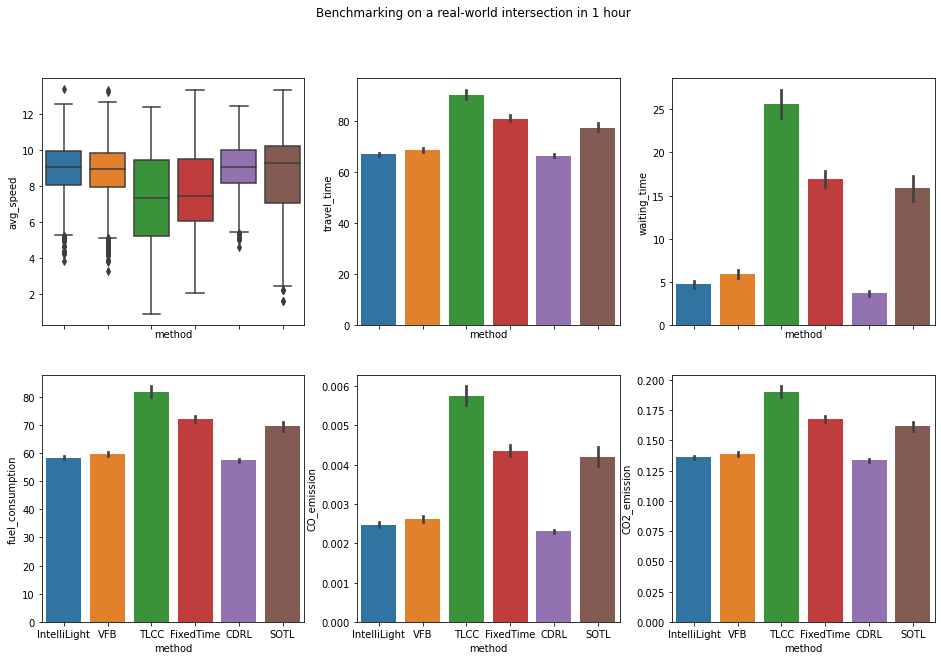

In [31]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,10))
fig.suptitle('Benchmarking on a real-world intersection in 1 hour')
sns.boxplot(ax=axes[0, 0], x="method", y='avg_speed', data=data)
sns.barplot(ax=axes[0, 1], x="method", y='travel_time', data=data)
sns.barplot(ax=axes[0, 2], x="method", y='waiting_time', data=data)
sns.barplot(ax=axes[1, 0], x="method", y='fuel_consumption', data=data)
sns.barplot(ax=axes[1, 1], x="method", y='CO_emission', data=data)
sns.barplot(ax=axes[1, 2], x="method", y='CO2_emission', data=data)
plt.savefig('output.svg')

In [255]:
final_log = {}
for method in os.listdir("./atlanta/"):
    final_log[method] = pickle.load(open('./atlanta/%s/log.pkl' % method, 'rb'))[-1]

In [258]:
final_log['CDRL']['veh_logs'][-1]['detail_log']

odict_keys([1656.0, 1657.0, 1658.0, 1659.0, 1660.0, 1661.0, 1662.0, 1663.0, 1664.0, 1665.0, 1666.0, 1667.0, 1668.0, 1669.0, 1670.0, 1671.0, 1672.0, 1673.0, 1674.0, 1675.0, 1676.0, 1677.0, 1678.0, 1679.0, 1680.0, 1681.0, 1682.0, 1683.0, 1684.0, 1685.0, 1686.0, 1687.0, 1688.0, 1689.0, 1690.0, 1691.0])

## Plot barchart by metrics of vehicles 

In [240]:
data = pd.DataFrame(columns=['method'] + metrics)
for k, v in final_log.items():
    veh_logs = v['veh_logs']
    for log in veh_logs:
        if log['finished'] != True:
            continue
        row = {
            'method': change_name_method(k),
            'avg_speed': log['avg_speed'],
            'travel_time': log['travel_time'],
            'waiting_time': log['waiting_time'],
            'fuel_consumption': log['fuel_consumption'],
            'CO_emission': log['CO_emission'] / 1000000,
            'CO2_emission': log['CO2_emission'] / 1000000,
        }
        data = data.append(row, ignore_index=True)

In [247]:
data[data['method']=='FT']['CO2_emission'].sum()

640.2291236019419

In [245]:
data[data['method']=='CDRL']['CO2_emission'].sum()

445.9471836122364

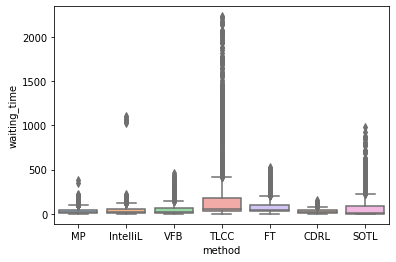

In [173]:
# df = data[data.method != 'TLCC']
sns.boxplot(x="method", y='waiting_time', data=data, palette="pastel")
tikzplotlib.save("test.tex")

## Plot barchart by metrics of intersections 

In [174]:
data = pd.DataFrame(columns=['method', 'step', 'intersection', 'waiting_time'])
avg_speed = 0
for method in os.listdir("./atlanta/"):
    for intersection in range(len(final_log[method]['tf_logs'])):
        for k, v in final_log[method]['tf_logs'][intersection].items():
            if k == 'lanes':
                continue
            w = np.mean(v['waiting_time'])
            if w < 0:
                print("???")
            data = data.append({
                'method': method,
                'intersection': intersection,
                'step': k,
                'waiting_time': w
            }, ignore_index=True)

KeyboardInterrupt: 

In [ ]:
sns.catplot(
    data=data, kind="bar", x="intersection", y="waiting_time", hue="method",ci=None,
    palette='Set1_r'
)

## Plot linechart by metrics of vehicles over time

In [43]:
# route_1 = ('-354587521#1', '-631653294#2', '-354587522#9', '-354587522#6', '-354587522#2', '-629278174#1')
# route_2 = ('354587523', '354587522#0', '354587522#3', '354587522#7', '631653294#0', '354587521#0')
data = pd.DataFrame(columns=['id', 'route', 'method', 'time', 'fuel', 'CO2'])
for method in os.listdir("./atlanta/"):
    print(method)
    for veh in final_log[method]['veh_logs']:
        if ((veh['finished'] == True)): #and (veh['route'] == route_1) or (veh['route'] == route_2)):
            accumulated_fuel = 0.0
            accumulated_CO2 = 0.0
            time = 0.0
            for k, log in veh['detail_log'].items():
                accumulated_fuel += log['fuel_consumption']
                accumulated_CO2 += log['CO2_emission']
                time += 1
                data = data.append({
                    'id': veh['id'],
                    'route': veh['route'],
                    'method': method,
                    'time': time,
                    'fuel': accumulated_fuel,
                    'CO2': accumulated_CO2
                }, ignore_index=True)

MaxPressure


KeyboardInterrupt: 

## Plot linechart by metrics of vehicles over intersections

In [101]:
routes = [veh['route'] for veh in final_log['CDRL']['veh_logs']]
routes = set(list(routes))

In [118]:
new_routes = []
for route in routes:
    if route[0] == "-533146591":
        new_routes.append(route[1:])
        continue
    elif route[-1] == "533146591":
        new_routes.append(route[:-1])
        continue
    new_routes.append(route)

In [119]:
def fix_route(route):
    if route[0] == "-533146591":
        return route[1:]
    if route[-1] == "533146591":
        return route[:-1]
    return route

In [224]:
data = pd.DataFrame(columns=['id', 'intersection', 'method', 'time_step', 'fuel', 'CO2'])
num_vehs = [0]*8
for method in os.listdir("./atlanta/"):
    print(method)
    for veh in final_log[method]['veh_logs']:
        check_points = fix_route(veh['route'])
        if len(check_points) != 6:
            continue
        check_point_idx = 1
        accumulated_fuel = 0
        accumulated_CO2 = 0
        step_time = 0.0
        for k, log in veh['detail_log'].items():
            if log['lane'][:-2] == check_points[check_point_idx]:
                data = data.append({
                    'id': veh['id'],
                    'intersection': check_point_idx,
                    'method': method,
                    'time_step': step_time,
                    'fuel': accumulated_fuel,
                    'CO2': accumulated_CO2,
                }, ignore_index=True)
                check_point_idx += 1
                if (check_point_idx >= len(check_points)):
                    break
            accumulated_fuel += log['fuel_consumption'] / 1000
            accumulated_CO2 += log['CO2_emission'] / 1000000
            step_time += 1
#         if check_point_idx == 1:
#             data = data.append({
#                     'id': veh['id'],
#                     'intersection': check_point_idx - 1,
#                     'method': method,
#                     'time': time,
#                     'fuel': accumulated_fuel,
#                     'CO2': accumulated_CO2
#                 }, ignore_index=True)

MaxPressure
IntelliLight
VFB
TLCC
FixedTime
CDRL
SOTL


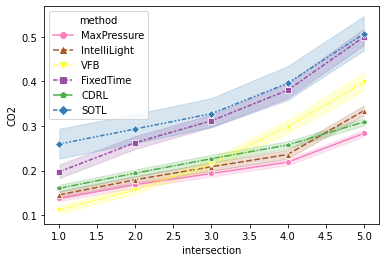

In [225]:
df = data[data.method != 'TLCC']
sns.lineplot(data=df, x="intersection", y='CO2', hue="method", style="method", markers=["o", "^", "v", "s", "p", "D"], palette='Set1_r')
tikzplotlib.save("test.tex")

## Num of vehicles ~ length of route

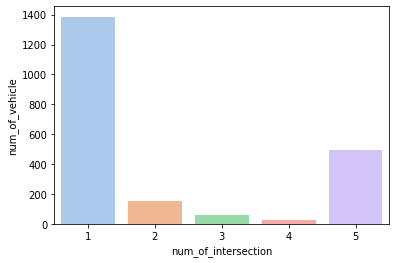

In [196]:
num = [0]*7
for veh in final_log['CDRL']['veh_logs']:
    num[len(fix_route(veh['route']))] += 1
data = pd.DataFrame(columns=['num_of_intersection', 'num_of_vehicle'])
for k, v in enumerate(num):
    if k <= 1:
        continue
    data = data.append({
        'num_of_intersection': k - 1,
        'num_of_vehicle': v
    }, ignore_index=True)
sns.barplot(data=data,x='num_of_intersection', y='num_of_vehicle', palette="pastel")
tikzplotlib.save("test.tex")

# CO2 emission ~ length of route

In [221]:
data = pd.DataFrame(columns=['num_of_intersection', 'CO2', 'method'])
for k, v in final_log.items():
    veh_logs = v['veh_logs']
    for veh in veh_logs:
        if veh['finished'] != True or len(fix_route(veh['route'])) < 2:
            continue
        row = {
            'num_of_intersection': len(fix_route(veh['route'])) - 1,
            'CO2': veh['CO2_emission'] / 1000000,
            'method': change_name_method(k)
        }
        data = data.append(row, ignore_index=True)

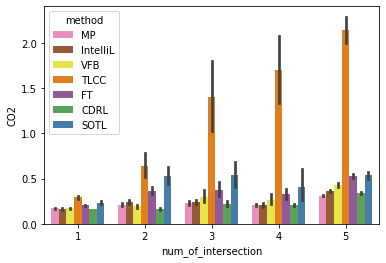

In [223]:
# df = data[data.method != 'TLCC']
sns.barplot(x='num_of_intersection', y='CO2', hue='method', data=data, palette='Set1_r')
tikzplotlib.save("test.tex")

<AxesSubplot:xlabel='intersection', ylabel='CO2'>

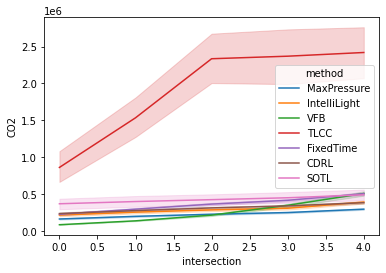

In [39]:
sns.lineplot(data=data, x="intersection", y='CO2', hue="method")

In [173]:
final_log['CDRL'].keys()

dict_keys(['veh_logs', 'tf_logs', 'avg_speed_per_step', 'CO2_emission', 'CO_emission', 'fuel_consumption', 'waiting_time', 'distance', 'travel_time', 'avg_speed'])

In [151]:
final_log['FixedTime']['veh_logs'][0]

{'avg_speed_per_step': 6.833066140060014,
 'CO2_emission': 280896.7841571538,
 'CO_emission': 8510.787401555886,
 'fuel_consumption': 120.74880948305041,
 'waiting_time': 41.0,
 'distance': 876.4655320677415,
 'travel_time': 129.0,
 'avg_speed': 6.7943064501375305,
 'finished': True}

In [50]:
for i in range(5):
    print(final_log['IntelliLight']['tf_logs'][i]['lanes'])

['-290405874#2_0', '-290405874#2_1', '-354587522#2_0', '-354587522#2_1', '290405872#0_0', '290405872#0_1', '354587523_0', '354587523_1']
['-9247806#2_0', '-354587522#6_0', '-354587522#6_1', '354587522#0_0', '354587522#0_1']
['354587522#3_0', '354587522#3_1', '-611582485#3_0', '-354587522#9_0', '-354587522#9_1', '9258925#0_0']
['354587522#7_0', '354587522#7_1', '-198659569#3_0', '-631653294#2_0', '-631653294#2_1', '9246225#4_0']
['631653294#0_0', '631653294#0_1', '-505912698#0_0', '-505912698#0_1', '-354587521#1_0', '-354587521#1_1', '-234013266#1_0', '-234013266#1_1']


In [54]:
for i in range(5):
    print(final_log['FixedTime']['tf_logs'][i]['lanes'])

['-290405874#2_0', '-290405874#2_1', '-354587522#2_0', '-354587522#2_1', '290405872#0_0', '290405872#0_1', '354587523_0', '354587523_1']
['-9247806#2_0', '-354587522#6_0', '-354587522#6_1', '354587522#0_0', '354587522#0_1']
['354587522#3_0', '354587522#3_1', '-611582485#3_0', '-354587522#9_0', '-354587522#9_1', '9258925#0_0']
['354587522#7_0', '354587522#7_1', '-198659569#3_0', '-631653294#2_0', '-631653294#2_1', '9246225#4_0']
['631653294#0_0', '631653294#0_1', '-505912698#0_0', '-505912698#0_1', '-354587521#1_0', '-354587521#1_1', '-234013266#1_0', '-234013266#1_1']


In [90]:
for i in range(5):
    print(i, np.mean(data[(data['method'] == 'IntelliLight') & (data['intersection'] == i)]['waiting_time']))
    print(i, np.mean(data[(data['method'] == 'TLCC') & (data['intersection'] == i)]['waiting_time']))
    print(i, np.mean(data[(data['method'] == 'MaxPressure') & (data['intersection'] == i)]['waiting_time']))

0 8.823759791122715
0 149.98642361111112
0 11.11161991986262
1 0.7012184508268058
1 129.75527777777776
1 2.744247281053234
2 0.8064984044096316
2 214.1277314814815
2 8.59292119824461
3 3.7975776037133735
3 126.42263888888888
3 7.31845067735165
4 247.95001087902523
4 288.0262847222222
4 18.88544647967945


In [132]:
# sns.color_palette("Set2")
sns.catplot(
    data=data, kind="bar", x="intersection", y="waiting_time", hue="method",ci=None,
    palette='Set1_r'
)

import tikzplotlib

tikzplotlib.save("atlanta.tex")

ValueError: Could not interpret input 'travel_time'